In [ ]:
#importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline 

In [11]:
#reading the dataframe
df=pd.read_csv("houseprediction.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [3]:
#describe:to get the statictical analysis 
df.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


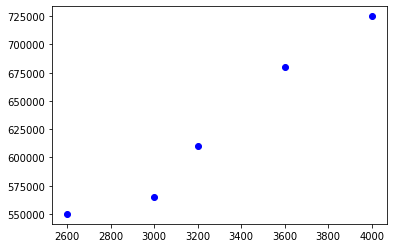

In [4]:
#plotting the datapoints in the training data 
plt.scatter(df.area,df.price,color='blue')
plt.xlabel=("area")
plt.ylabel=("price")
plt.show()

In [5]:
#splitting the data as train and test
msk=np.random.rand(len(df))<0.75
train=df[msk]
test=df[~msk]

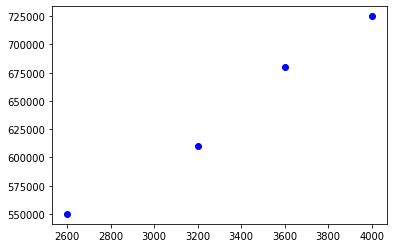

In [6]:
#drawing the graph for the training data 
plt.scatter(train.area,train.price,color='blue')
plt.xlabel=("area")
plt.ylabel=("price")
plt.show()

In [7]:
#fitting the model with sk learn 
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['area']])
train_y=np.asanyarray(train[['price']])
regr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
#finding the coef
regr.coef_

array([[128.27102804]])

In [9]:
#finding the intercept
regr.intercept_

array([211542.05607477])

TypeError: 'str' object is not callable

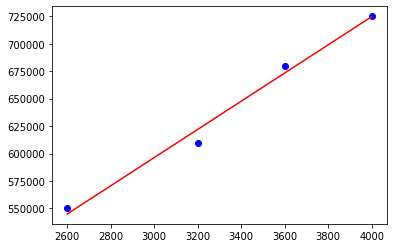

In [10]:
#fitting the curve/ parameter 
#note:coef=2d array and intercept is 1d array
plt.scatter(train.area,train.price,color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],'-r')
plt.xlabel("area")
plt.ylabel("price")

In [12]:
#prediction to a new value made out of the dataset
test_x=np.asanyarray(test[['area']])
test_y=np.asanyarray(test[['price']])
regr.predict(test[['price']])

array([[72684672.89719625]])

In [14]:
#same as the above cell but to calculate the error respectively
test_x=np.asanyarray(test[['area']])
test_y=np.asanyarray(test[['price']])
test_y_hat=regr.predict(test[['price']])

In [ ]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2 Score: %.2f" %r2_score(test_y_hat,test_y))

In [ ]:
#predicting the actual value
regr.predict([[3300]])